# **Importing Libraries**

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Loading and Visualizing Data**

In [312]:
corona_pd=pd.read_csv("../input/covid19-symptoms-checker/Cleaned-Data.csv")
corona_pd.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
69720,1,1,1,1,1,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,Iran
116166,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,1,Republic of Korean
60382,0,0,1,1,1,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,Italy
118758,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,Republic of Korean
273721,0,0,1,1,1,0,0,0,1,1,...,1,0,1,0,0,0,0,1,0,Other-EUR


In [313]:
#Returns the  meta data of the dataset.
corona_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [314]:
#Returns the information like mean,max,min,etc., of the dataset.
corona_pd.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [315]:
#To remove the columns of the DataFrame in memory.
corona_pd.drop(["Country"],axis=1,inplace=True)
corona_pd.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
270412,1,1,1,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
281022,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
247512,1,1,0,0,0,0,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1
77491,0,0,1,0,0,0,1,1,1,1,...,0,1,0,0,0,0,1,0,1,0
138453,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1


In [317]:
#Returns the sum of null values under each column.
corona_pd.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [316]:
#To check whether the row contains duplicate values or not.
corona_pd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

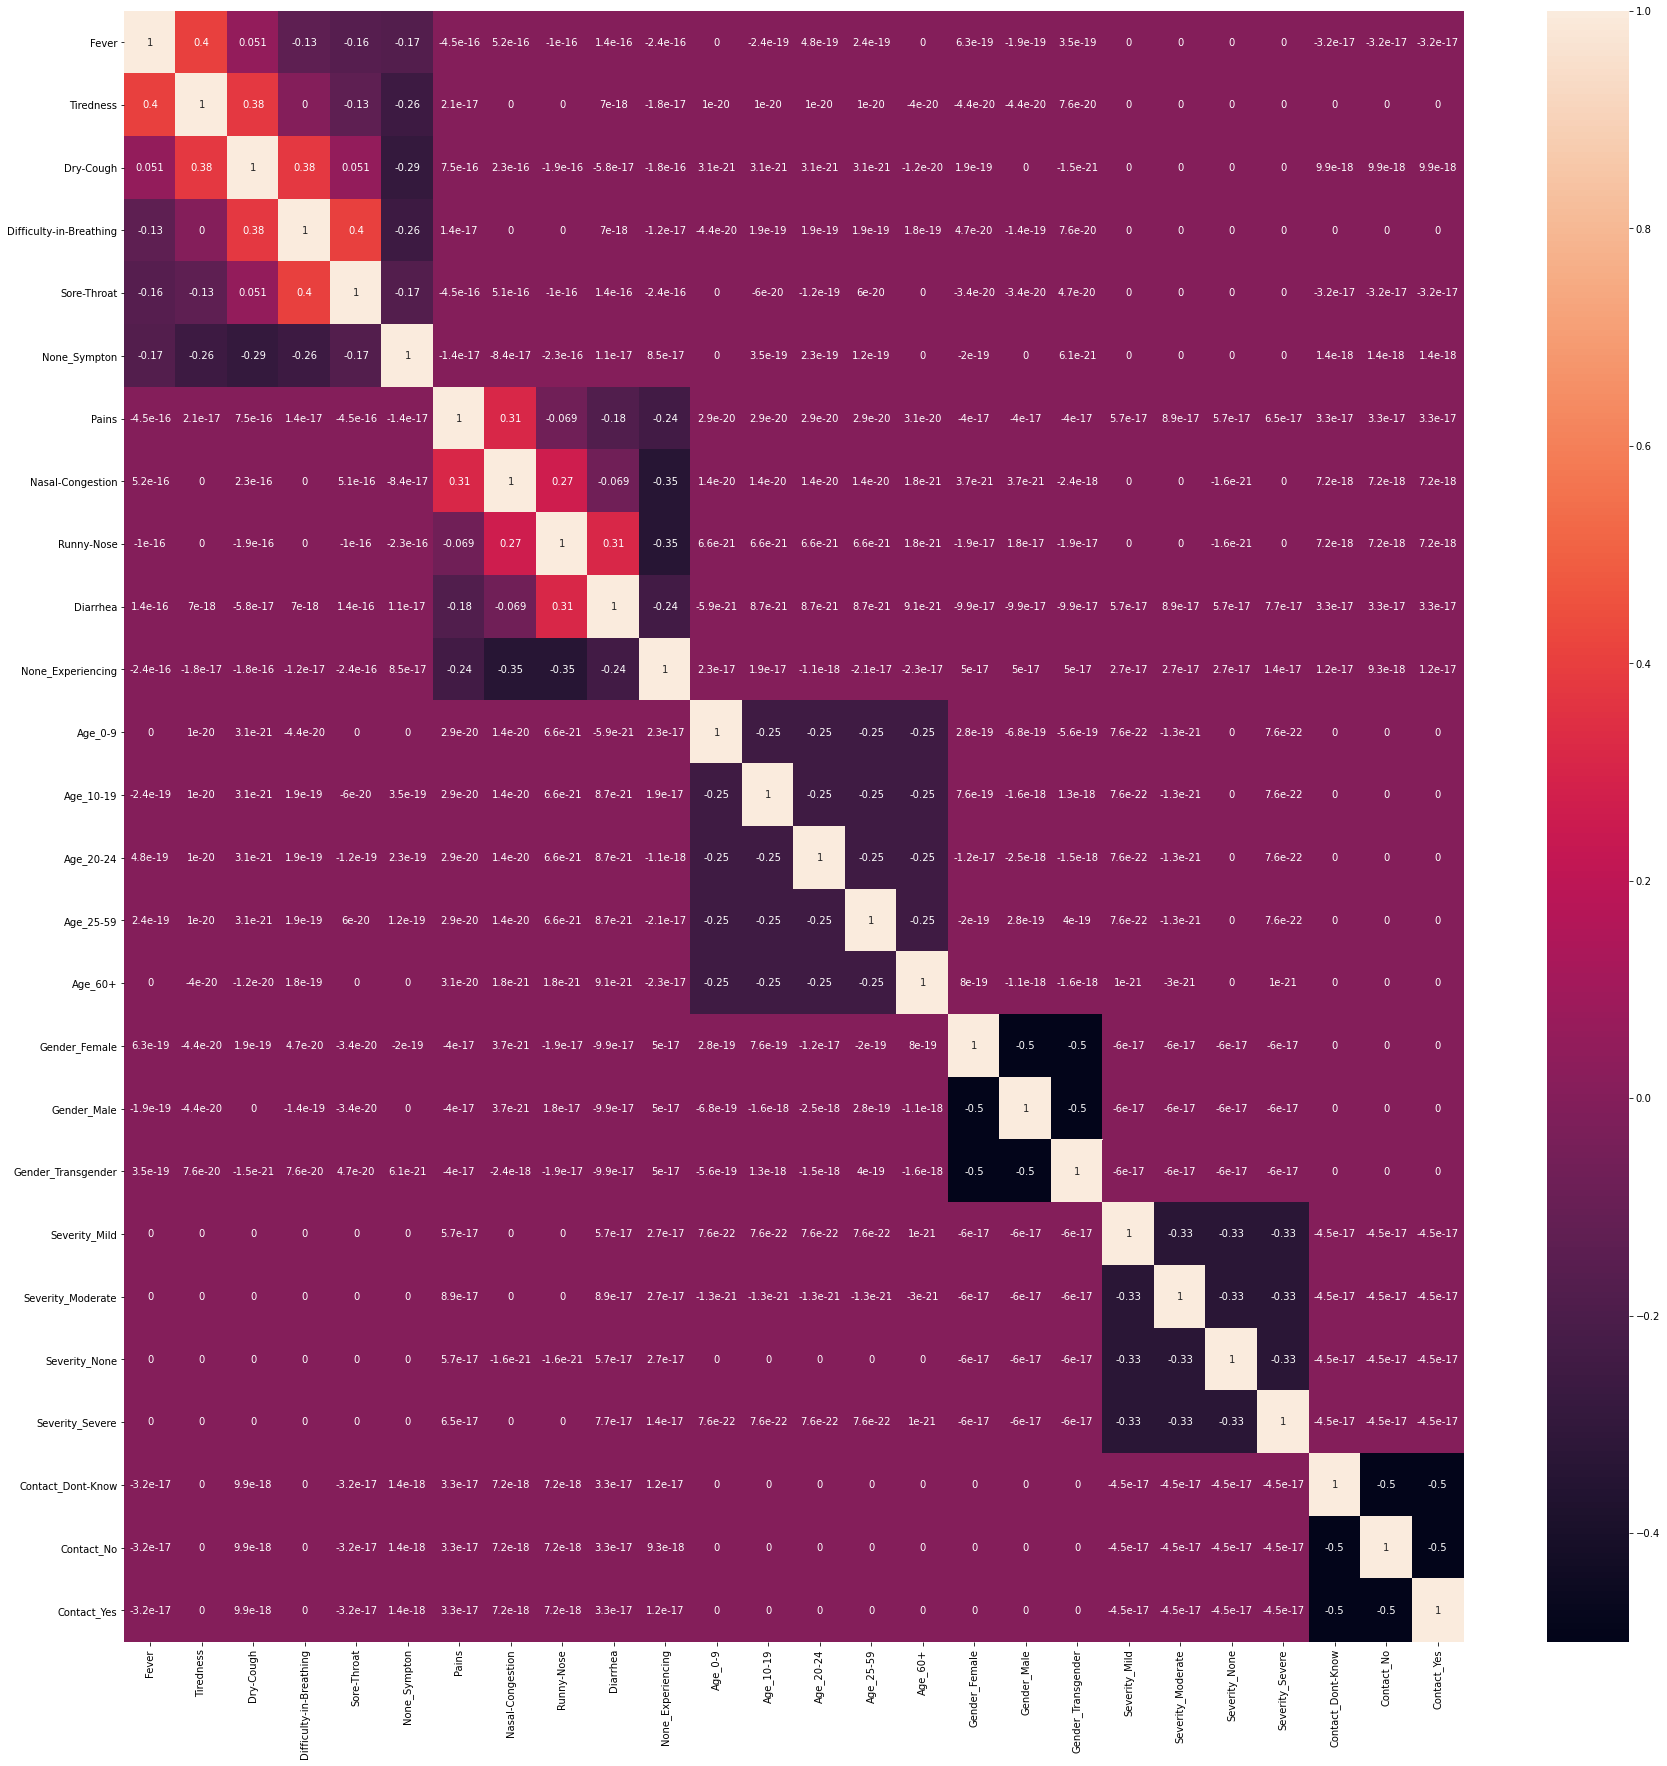

In [352]:
#To plot a correlation matrix between features.
f,ax= plt.subplots(figsize=(30,30))
sns.heatmap(corona_pd.corr(),annot=True)

You can see from the above visualization that each feature has a effect on other features.

# **Elbow Method**
Used to find optimal number of clusters.

In [319]:
#To scale the values along columns.
scaler= StandardScaler()
corona_pd_scaled=scaler.fit_transform(corona_pd)

In [320]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(corona_pd_scaled)
    scores.append(corona_means.inertia_)

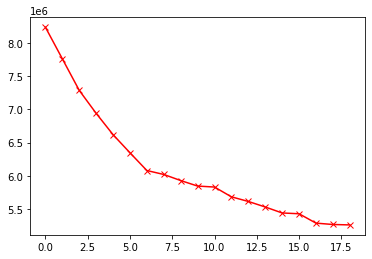

In [321]:
#Plotting the values obtained to get the optimal K-value.
plt.plot(scores,"-rx")

At point 7 ,the graph looks like a elbow. So we choose this as our K value.

# **K-MEANS Implementation**

In [331]:
#Applying K-means algorithm with the obtained K value.
corona_means=KMeans(n_clusters=7)
corona_means.fit(corona_pd_scaled)

KMeans(n_clusters=7)

In [332]:
#Returns an array with cluster labels to which it belongs.
labels=corona_means.labels_

In [353]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
corona_pd_m=pd.DataFrame(corona_means.cluster_centers_,columns=corona_pd.columns)
corona_pd_m

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-7.559289e-01,-1.095445e+00,-1.095445e+00,-7.559289e-01,...,2.282373e-15,-3.364845e-16,-5.516032e-16,-1.007892e-19,-3.359640e-20,-7.394768e-17,-3.359640e-20,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,3.111174e-16,-9.171215e-15,-1.073331e-14,1.732051e+00,-5.773503e-01,-5.773503e-01,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,3.005908e-16,-9.181320e-15,-1.071310e-14,-5.773503e-01,1.732051e+00,-5.773503e-01,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17
3,0.046548,0.069042,0.078287,0.064588,0.041743,-0.258199,7.281498e-02,1.095445e-01,1.113337e-01,7.744484e-02,...,1.574848e-03,-3.149696e-04,-1.259878e-03,-5.773503e-01,-5.773503e-01,-5.773503e-01,1.732051e+00,-7.071068e-01,1.414214e+00,-7.071068e-01
4,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.304126e-16,-3.218960e-16,4.300096e-16,5.369232e-17,...,1.329361e-15,-2.159075e-16,2.135820e-16,-1.366752e-19,-4.555839e-20,-7.392375e-17,-4.555839e-20,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044148,0.065483,0.074251,0.067703,0.046543,-0.258199,7.697723e-02,1.095445e-01,1.086529e-01,7.467001e-02,...,-7.848022e-04,1.569604e-04,6.278418e-04,-5.773503e-01,-5.773503e-01,-5.773503e-01,1.732051e+00,3.523762e-01,-7.047524e-01,3.523762e-01
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.791166e-16,-9.241953e-15,-1.070973e-14,-5.773503e-01,-5.773503e-01,1.732051e+00,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17


It's clear from the above table that the people at cluster 4 are **not affected with corona** while **other clusters do affected with corona**. The other clusters can also be classified. Have a close look you can find difference between the clusters.

In [334]:
#Concatenating the cluster labels.
corona_cluster=pd.concat([corona_pd,pd.DataFrame({"Cluster":labels})],axis=1)
corona_cluster.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
184244,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,5
157653,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,6
138565,0,0,1,1,1,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,1
31481,0,0,0,0,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,2
49971,0,0,1,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,2


# **Principal Component Analysis (PCA)**
Used to perform dimentionality reduction to have a better view of clusters of examples.

In [335]:
#Implementing pca with 3 components i.e 3d plot
corona_pca=PCA(n_components=3)
principal_comp=corona_pca.fit_transform(corona_pd_scaled)

In [336]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp.head()

,pca1,pca2,pca3
0,-2.172801,-1.635728,-0.135941
1,-2.183502,-1.567582,-0.236367
2,-2.193031,-1.549799,-0.259509
3,-2.203146,-1.590260,-0.169365
4,-2.213846,-1.522115,-0.269791


In [337]:
principal_comp=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp.sample(5)

,pca1,pca2,pca3,Cluster
126106,0.579023,0.763539,-0.026272,6
282280,-0.311996,-0.688305,0.967386,2
280554,0.736827,-1.153681,0.884032,5
256745,-0.869638,-1.606210,2.000524,2
10395,1.261759,0.115496,1.388933,2


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



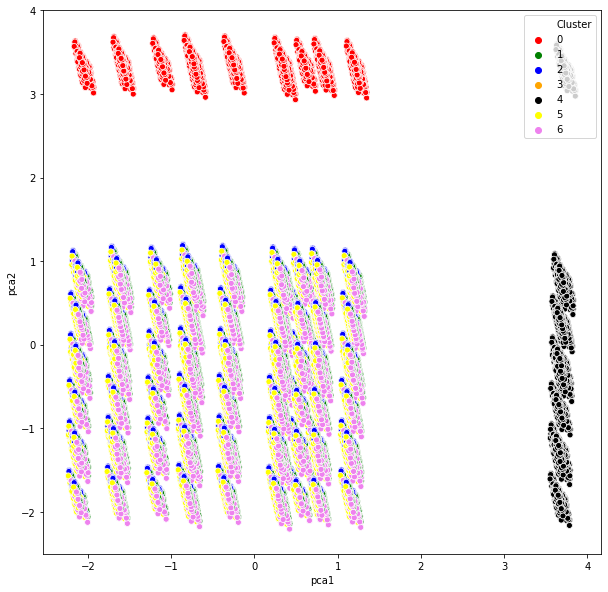

In [338]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

You can understand the same from the above visualization which I mentioned earlier.

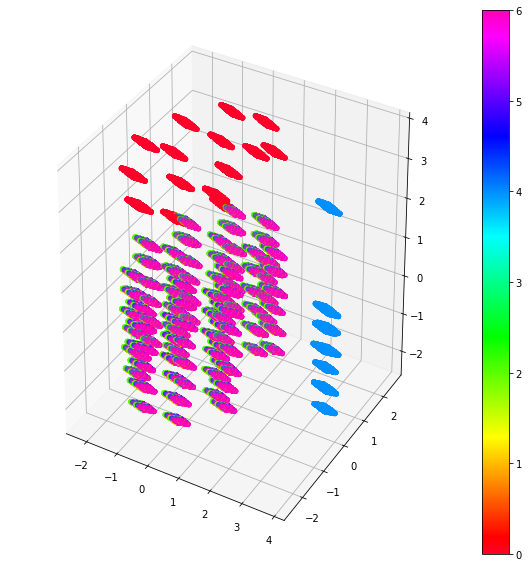

In [351]:
#Plotting the 3d-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp['pca1'],ys=principal_comp['pca3'],zs=principal_comp['pca2'],c=principal_comp['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()

You can have a even better view from the above plot.

For K-Means algorithm - Refer this [link](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiInYrt2cDqAhUbyzgGHaiTBHAQwqsBMAF6BAgKEAQ&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DhDmNF9JG3lo&usg=AOvVaw0uqMZBuHXA-UDOHz-ymSfK)

For PCA - Refer this [link](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjB1NOK28DqAhUjguYKHUNxDxwQwqsBMAB6BAgKEAQ&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3Drng04VJxUt4&usg=AOvVaw14_fwoAfo-0sWFezc-7qiy)

Thank You!